In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import pysindy as ps
import matplotlib.pyplot as plt

In [2]:
initial_conditions = [0, 1]
t_span = [0, 100]
dt = 0.01
t_values = np.arange(t_span[0], t_span[1], dt)

df = pd.read_excel("./datasets/dataset_1.xlsx")
dt =0.01

In [3]:
optimizer = ps.STLSQ(threshold=0.1)
model = ps.SINDy(optimizer=optimizer)
model.fit(df[['x_1', 'x_2']], t=dt)
model.print()

x0 = initial_conditions
predicted_without_sin = model.simulate(x0, t_values)

predicted_df_without_sin = pd.DataFrame(predicted_without_sin, columns=['x1_pred', 'x2_pred'])
predicted_df_without_sin['Time'] = t_values

(x0)' = 0.996 x1
(x1)' = -0.934 x0 + -0.102 x1


In [4]:
library_functions = [lambda x: np.sin(x)]
library_function_names = [lambda x: f"sin({x})"]

library = ps.CustomLibrary(library_functions=library_functions, function_names=library_function_names)
combined_library = ps.PolynomialLibrary() + library

model = ps.SINDy(feature_library=combined_library, optimizer=optimizer)

model.fit(df[['x_1', 'x_2']], t=dt)
model.print()

x0 = initial_conditions
predicted_with_sin = model.simulate(x0, t_values)

predicted_df_with_sin = pd.DataFrame(predicted_with_sin, columns=['x1_pred', 'x2_pred'])
predicted_df_with_sin['Time'] = t_values

(x0)' = 0.783 x1 + 0.227 sin(x1)
(x1)' = -0.102 x1 + -0.999 sin(x0)


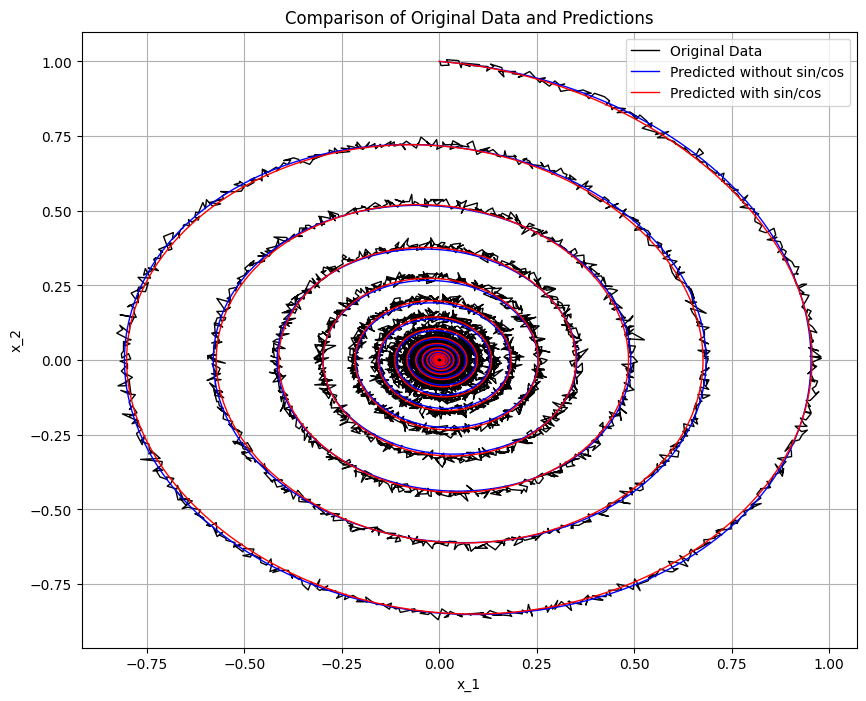

In [5]:
plt.figure(figsize=(10, 8))

plt.plot(df['x_1'], df['x_2'], 'k', label='Original Data', linewidth=1)

plt.plot(predicted_df_without_sin['x1_pred'], predicted_df_without_sin['x2_pred'], 'b', label='Predicted without sin/cos', linewidth=1)

plt.plot(predicted_df_with_sin['x1_pred'], predicted_df_with_sin['x2_pred'], 'r', label='Predicted with sin/cos', linewidth=1)

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Comparison of Original Data and Predictions')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
from sklearn.linear_model import Lasso
optimizer_lasso = Lasso(alpha=0.001)
model = ps.SINDy(optimizer=optimizer_lasso)
model.fit(df[['x_1', 'x_2']], t=dt)
model.print()

x0 = initial_conditions
predicted_without_sin_with_lasso = model.simulate(x0, t_values)

predicted_df_without_sin_with_lasso = pd.DataFrame(predicted_without_sin_with_lasso, columns=['x1_pred', 'x2_pred'])
predicted_df_without_sin_with_lasso['Time'] = t_values


(x0)' = 0.996 x1
(x1)' = -0.934 x0 + -0.102 x1


In [7]:
model = ps.SINDy(feature_library=combined_library, optimizer=optimizer_lasso)

model.fit(df[['x_1', 'x_2']], t=dt)
model.print()

x0 = initial_conditions
predicted_with_sin_with_lasso = model.simulate(x0, t_values)

predicted_df_with_sin_with_lasso = pd.DataFrame(predicted_with_sin_with_lasso, columns=['x1_pred', 'x2_pred'])
predicted_df_with_sin_with_lasso['Time'] = t_values

(x0)' = 0.996 x1
(x1)' = -0.019 x0 + -0.102 x1 + -0.979 sin(x0)


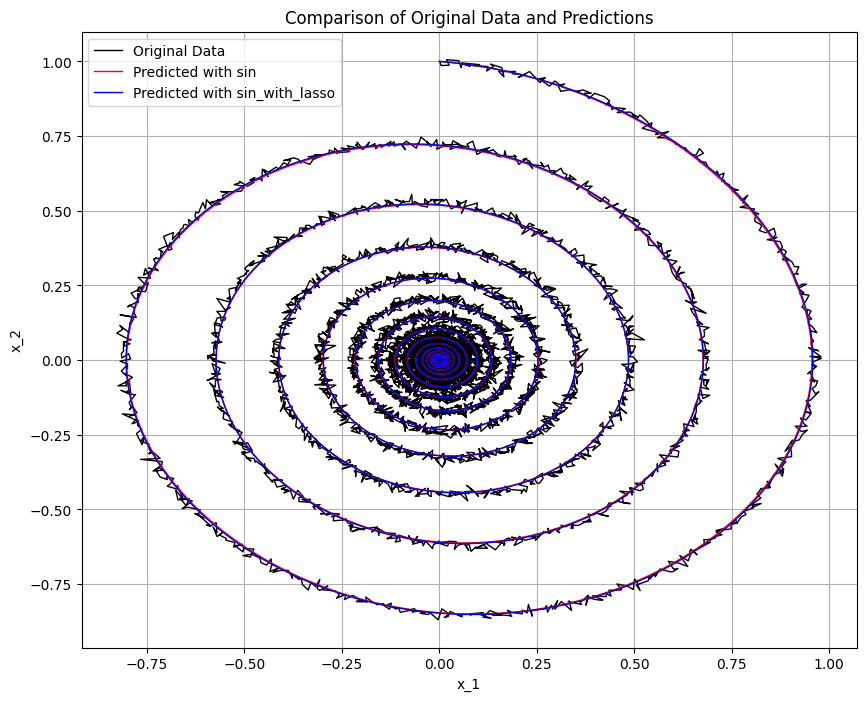

In [8]:
plt.figure(figsize=(10, 8))

plt.plot(df['x_1'], df['x_2'], 'k', label='Original Data', linewidth=1)

plt.plot(predicted_df_with_sin['x1_pred'], predicted_df_with_sin['x2_pred'], 'r', label='Predicted with sin', linewidth=1)

plt.plot(predicted_df_with_sin_with_lasso['x1_pred'], predicted_df_with_sin_with_lasso['x2_pred'], 'b', label='Predicted with sin_with_lasso', linewidth=1)


plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Comparison of Original Data and Predictions')
plt.legend()
plt.grid(True)
plt.show()
